<a href="https://colab.research.google.com/github/joachimwan/CubeSolver/blob/main/Cube_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
# cube.py

import numpy as np
import matplotlib.pyplot as plt


class Pieces:
  def __init__(self, x, y, z):
    self.color = {"F":0, "B":0, "L":0, "R":0, "U":0, "D":0}
    self.position = np.array([x, y, z])
  
  def rotate_x(self):
    # rotate position along right-left axis
    rotate_x = np.array([[ 1, 0, 0],
                         [ 0, 0, 1],
                         [ 0,-1, 0]])
    old_position = self.position.reshape(3,1)
    new_position = np.matmul(rotate_x, old_position)
    self.position = new_position.transpose()[0]
    
    # rotate color
    self.color = {"F":self.color["D"], "B":self.color["U"], "L":self.color["L"], "R":self.color["R"], "U":self.color["F"], "D":self.color["B"]}
  
  def rotate_y(self):
    # rotate position along up-down axis
    rotate_y = np.array([[ 0, 0,-1],
                         [ 0, 1, 0],
                         [ 1, 0, 0]])
    old_position = self.position.reshape(3,1)
    new_position = np.matmul(rotate_y, old_position)
    self.position = new_position.transpose()[0]
    
    # rotate color
    self.color = {"F":self.color["R"], "B":self.color["L"], "L":self.color["F"], "R":self.color["B"], "U":self.color["U"], "D":self.color["D"]}

  def rotate_z(self):
    # rotate position along front-back axis
    rotate_z = np.array([[ 0, 1, 0],
                         [-1, 0, 0],
                         [ 0, 0, 1]])
    old_position = self.position.reshape(3,1)
    new_position = np.matmul(rotate_z, old_position)
    self.position = new_position.transpose()[0]
    
    # rotate color
    self.color = {"F":self.color["F"], "B":self.color["B"], "L":self.color["D"], "R":self.color["U"], "U":self.color["L"], "D":self.color["R"]}


class Cube:
  def __init__(self):
    # initialize pieces
    self.action_space = ["R", "R'", "L", "L'", "U", "U'", "D", "D'", "F", "F'", "B", "B'"]
    self.pieces = []
    for x in range(3):
      for y in range(3):
        for z in range(3):
          self.pieces.append(Pieces(x-1,y-1,z-1))
    # initialize colors
    for piece in self.pieces:
      if piece.position[0] == 1:
        piece.color["R"] = 4
      if piece.position[0] == -1:
        piece.color["L"] = 3
      if piece.position[1] == 1:
        piece.color["U"] = 5
      if piece.position[1] == -1:
        piece.color["D"] = 6
      if piece.position[2] == 1:
        piece.color["F"] = 1
      if piece.position[2] == -1:
        piece.color["B"] = 2
  
  # get current state
  def state(self):
    s = []
    for x in range(3):
      for y in range(3):
        for z in range(3):
          for piece in self.pieces:
            if np.array_equal(piece.position, np.array([x-1, y-1, z-1])):
              for side in ["F", "B", "L", "R", "U", "D"]:
                if piece.color[side] is not 0:
                  s.append(piece.color[side])
    return np.array(s)
  
  # set current state to input state
  def set_state(self, s):
    for x in range(3):
      for y in range(3):
        for z in range(3):
          for piece in self.pieces:
            if np.array_equal(piece.position, np.array([x-1, y-1, z-1])):
              for side in ["F", "B", "L", "R", "U", "D"]:
                if piece.color[side] is not 0:
                  piece.color[side] = s[0]
                  s = np.delete(s,0)
  
  # move using input action e.g. ["F", "B", "U'"]
  def move(self, action):
    for a in np.array(action).reshape(-1):
      if a == "R":
        self.rotate_right()
      if a == "R'":
        self.rotate_right_p()
      if a == "L":
        self.rotate_left()
      if a == "L'":
        self.rotate_left_p()
      if a == "U":
        self.rotate_up()
      if a == "U'":
        self.rotate_up_p()
      if a == "D":
        self.rotate_down()
      if a == "D'":
        self.rotate_down_p()
      if a == "F":
        self.rotate_front()
      if a == "F'":
        self.rotate_front_p()
      if a == "B":
        self.rotate_back()
      if a == "B'":
        self.rotate_back_p()
    return self.state()
  
  # randomly shuffle according to number of steps (rotation)
  def shuffle(self, num_steps=1, show=False):
    self.__init__()
    action = []
    for _ in range(num_steps):
      action.append(self.action_space[np.random.randint(low=0, high=len(self.action_space))])
    self.move(action)
    if show:
      print("Shuffled cube:", action)
    return self.state()
  
  # helper function for indexing states
  @ staticmethod
  def state_to_index(s):
    string_list = [str(i) for i in s]
    integer = int("".join(string_list))
    return(integer)
  
  # helper function for MCTS: set dummy cube to state, take action, return new state
  @ staticmethod
  def get_next_state(s, action):
    dummy = Cube()
    dummy.set_state(s)
    dummy.move(action)
    return dummy.state()

  # find which pieces to rotate
  def rotate_right(self):
    for piece in self.pieces:
      if piece.position[0] == 1:
        piece.rotate_x()
  
  def rotate_right_p(self):
    for piece in self.pieces:
      if piece.position[0] == 1:
        piece.rotate_x()
        piece.rotate_x()
        piece.rotate_x()
  
  def rotate_left(self):
    for piece in self.pieces:
      if piece.position[0] == -1:
        piece.rotate_x()
        piece.rotate_x()
        piece.rotate_x()

  def rotate_left_p(self):
    for piece in self.pieces:
      if piece.position[0] == -1:
        piece.rotate_x()
  
  def rotate_up(self):
    for piece in self.pieces:
      if piece.position[1] == 1:
        piece.rotate_y()
  
  def rotate_up_p(self):
    for piece in self.pieces:
      if piece.position[1] == 1:
        piece.rotate_y()
        piece.rotate_y()
        piece.rotate_y()
  
  def rotate_down(self):
    for piece in self.pieces:
      if piece.position[1] == -1:
        piece.rotate_y()
        piece.rotate_y()
        piece.rotate_y()

  def rotate_down_p(self):
    for piece in self.pieces:
      if piece.position[1] == -1:
        piece.rotate_y()
  
  def rotate_front(self):
    for piece in self.pieces:
      if piece.position[2] == 1:
        piece.rotate_z()
  
  def rotate_front_p(self):
    for piece in self.pieces:
      if piece.position[2] == 1:
        piece.rotate_z()
        piece.rotate_z()
        piece.rotate_z()
  
  def rotate_back(self):
    for piece in self.pieces:
      if piece.position[2] == -1:
        piece.rotate_z()
        piece.rotate_z()
        piece.rotate_z()

  def rotate_back_p(self):
    for piece in self.pieces:
      if piece.position[2] == -1:
        piece.rotate_z()
  
  # check for solved state
  def solved(self, s=None):
    F, B, L, R, U, D = set(), set(), set(), set(), set(), set()

    dummy = Cube()
    if s is not None:
      dummy.set_state(s)
    else:
      dummy.set_state(self.state())
    
    for piece in dummy.pieces:
      F.add(piece.color["F"])
      B.add(piece.color["B"])
      L.add(piece.color["L"])
      R.add(piece.color["R"])
      U.add(piece.color["U"])
      D.add(piece.color["D"])
    if len(F) == 2 and len(B) == 2 and len(L) == 2 and len(R) == 2 and len(U) == 2 and len(D) == 2:
      return True
    else:
      return False
  
  def draw(self):
    color = ["black", "blue", "green", "orange", "red", "yellow", "whitesmoke"]
    
    plt.figure(figsize=[20,15], dpi=80, facecolor='white')

    c, pos = {}, {}
    
    # create empty dicts
    for side in ["F", "B", "L", "R", "U", "D"]:
      c[side] = []
      pos[side] = []
    
    # retrieve face color
    for piece in self.pieces:
      if piece.position[1]==1:
        c["U"].append(piece.color["U"])
        pos["U"].append(piece.position[0:3:2])
      if piece.position[0]==-1:
        c["L"].append(piece.color["L"])
        pos["L"].append(piece.position[1:])
      if piece.position[2]==1:
        c["F"].append(piece.color["F"])
        pos["F"].append(piece.position[:2])
      if piece.position[0]==1:
        c["R"].append(piece.color["R"])
        pos["R"].append(piece.position[1:])
      if piece.position[2]==-1:
        c["B"].append(piece.color["B"])
        pos["B"].append(piece.position[:2])
      if piece.position[1]==-1:
        c["D"].append(piece.color["D"])
        pos["D"].append(piece.position[0:3:2])

    # Up
    plt.subplot(3,4,2)
    for i, p in enumerate(pos["U"]):
      plt.plot(p[0], p[1], color=color[c["U"][i]], marker='s', linestyle='None', markersize=80)
      if np.array_equal(p, np.array([0, 0])):
        color_num = c["U"][i]
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')
    plt.gca().set_title("Up - " + color[color_num] + " - " + str(color_num))

    # Left
    plt.subplot(3,4,5)
    for i, p in enumerate(pos["L"]):
      plt.plot(p[1], p[0], color=color[c["L"][i]], marker='s', linestyle='None', markersize=80)
      if np.array_equal(p, np.array([0, 0])):
        color_num = c["L"][i]
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')
    plt.gca().set_title("Left - " + color[color_num] + " - " + str(color_num))

    # Front
    plt.subplot(3,4,6)
    for i, p in enumerate(pos["F"]):
      plt.plot(p[0], p[1], color=color[c["F"][i]], marker='s', linestyle='None', markersize=80)
      if np.array_equal(p, np.array([0, 0])):
        color_num = c["F"][i]
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')
    plt.gca().set_title("Front - " + color[color_num] + " - " + str(color_num))

    # Right
    plt.subplot(3,4,7)
    for i, p in enumerate(pos["R"]):
      plt.plot(p[1], p[0], color=color[c["R"][i]], marker='s', linestyle='None', markersize=80)
      if np.array_equal(p, np.array([0, 0])):
        color_num = c["R"][i]
    plt.gca().invert_xaxis()
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')
    plt.gca().set_title("Right - " + color[color_num] + " - " + str(color_num))

    # Back
    plt.subplot(3,4,8)
    for i, p in enumerate(pos["B"]):
      plt.plot(p[0], p[1], color=color[c["B"][i]], marker='s', linestyle='None', markersize=80)
      if np.array_equal(p, np.array([0, 0])):
        color_num = c["B"][i]
    plt.gca().invert_xaxis()
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')
    plt.gca().set_title("Back - " + color[color_num] + " - " + str(color_num))

    # Down
    plt.subplot(3,4,10)
    for i, p in enumerate(pos["D"]):
      plt.plot(p[0], p[1], color=color[c["D"][i]], marker='s', linestyle='None', markersize=80)
      if np.array_equal(p, np.array([0, 0])):
        color_num = c["D"][i]
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')
    plt.gca().set_title("Down - " + color[color_num] + " - " + str(color_num))


# cube = Cube()
# cube.draw()

In [ ]:
# nnet.py

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# consider to include residual block and add inputs

def create_model():
  # main block
  inputs = keras.Input(shape=(54,), name="inputs")
  x = layers.Dense(128, activation="relu")(inputs)
  x = layers.Dense(256, activation="relu")(x)
  block_1_output = layers.Dense(128, activation="relu")(x)

  # value head
  value_output = layers.Dense(1, activation="linear", name="value")(block_1_output)

  # policy head
  policy_output = layers.Dense(12, activation="softmax", name="policy")(block_1_output)

  # build model
  model = keras.Model(inputs=inputs, outputs=[value_output, policy_output])

  # compile model with optimizer and loss functions
  model.compile(
      optimizer=keras.optimizers.RMSprop(),  # Adam will do just fine
      loss={
          "value": keras.losses.MeanSquaredError(),
          "policy": keras.losses.CategoricalCrossentropy(from_logits=False),
      },
      loss_weights=[2.0, 0.2],
      metrics=['accuracy']
  )

  model.summary()

  # visualize the model
  keras.utils.plot_model(model, "Rubik_solver_model.png", show_shapes=True)

  return model

In [ ]:
# MCTS.py

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

class MCTS:

  def __init__(self):
    self.visited = [[0,0]]
    # used to track what states are visited in this search of 1600 iterations
    # use an integer index to map onto a state
    # [[index, state],
    #  [integer, list of 54 numbered colors],
    #  [integer, list of integer]]

    self.Q = {}
    # {index: policy for each actions updated every iteration,
    #  integer: list of policy for each 12 actions,
    #  integer: list of float}

    self.N = {}
    # {index: number of times visited for each actions updated every iteration,
    #  integer: list of number visited for each 12 actions,
    #  integer: list of integer}
  
  def search(self, s, model, depth=0, trail=[]):
    dummy = Cube()
    dummy.set_state(s)

    # check for terminal state
    if dummy.solved():
      # print("Found solved state!")
      return float('inf')
    
    # check for leaf node
    elif dummy.state_to_index(s) not in np.array(self.visited)[:,0]:
      # print("Found leaf node!")
      self.visited.append([dummy.state_to_index(s), s])
      self.Q[dummy.state_to_index(s)]=np.zeros(len(dummy.action_space))
      self.N[dummy.state_to_index(s)]=np.zeros(len(dummy.action_space))
      v, p = model.predict(s.reshape(1,-1))
      return v
    
    # limit the depth of search to prevent recurrence
    elif depth == max_depth:
      # print("Reached max depth!")
      v, p = model.predict(s.reshape(1,-1))
      return v

    # selection action with highest Upper Confidence Bound
    else:
      max_UCB = float('-inf')
      best_action = -1
      c_puct = 1
      for a in range(len(dummy.action_space)):
        UCB = self.Q[dummy.state_to_index(s)][a] + c_puct * np.sqrt(sum(self.N[dummy.state_to_index(s)])/(self.N[dummy.state_to_index(s)][a]+1))
        if UCB > max_UCB:
          max_UCB = UCB
          best_action = a
      next_state = dummy.get_next_state(s, [dummy.action_space[best_action]])
      
      depth += 1
      trail.append(best_action)
      # print("Action trail is", trail)

      v = self.search(next_state, model, depth, trail)
      # print("Returned value is", v)

      # self.Q[dummy.state_to_index(s)][best_action] = (self.Q[dummy.state_to_index(s)][best_action] * self.N[dummy.state_to_index(s)][best_action] + v)/(self.N[dummy.state_to_index(s)][best_action] + 1)
      self.Q[dummy.state_to_index(s)][best_action] = np.max(self.Q[dummy.state_to_index(s)][best_action], v)
      self.N[dummy.state_to_index(s)][best_action] += 1

      return v
  
  def policy(self, s):
    return self.N[Cube().state_to_index(s)]/sum(self.N[Cube().state_to_index(s)])

In [ ]:
# main.py

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pickle
import datetime
%matplotlib inline
%load_ext tensorboard

# create cube
cube = Cube()

# create neural network model
model = create_model()

# try:
#     model = keras.models.load_model("saved_model")
# except Exception as e:
#     print("Error:", e)

try:
    model.load_weights("/content/drive/MyDrive/Colab Notebooks/CubeSolverFiles/ckpt")
    print(model.get_weights()[0])
except Exception as e:
    print("Error:", e)

training_data = []
# used to fit the model after 25k games, stores only the states from latest 500k games, every mini-batch is 2048 states x 1000 times
# to include [[state, MCTS policy (updated after MCTS, 1600 search per move), value (updated at end of game), action taken],
#             [list of 54 numbered colors, list of policy for each 12 actions, value of current state, action taken],
#             [list of integer, list of floats, float, string]]

try:
    with open('/content/drive/MyDrive/Colab Notebooks/CubeSolverFiles/training_data.data', 'rb') as filehandle:
      # read the data as binary data stream
      training_data = pickle.load(filehandle)
except Exception as e:
    print("Error:", e)

num_iterations = 1
num_episodes = 20  # 25000, number of shuffled states to solve before training
num_MCTS = 1000  # 1600, number of search per action
max_action = 8  # limit max number of actions per episode
max_depth = 12  # limit max number of depth per search

def self_play(cube, model, exploration=False):
  for i in range(num_iterations):
    summary = []
    for e in range(num_episodes):
      print("========== New episode", e+1, "- shuffling cube! ==========")
      s = cube.shuffle(num_steps=i+5, show=True)  # state of a randomly shuffled cube

      moves, move_counter = execute(s, model, exploration)
      summary.append(move_counter)

      if move_counter<max_action+1:
        for data in moves:
          training_data.append(data)
          if len(training_data) == 500000:
            training_data.pop(0)
      else:
        print("Reached max number of actions!")
    
    # self play statistics
    move_avg = np.average(summary)
    success_rate = (1-summary.count(max_action+1)/len(summary))*100
    print("Average moves =", move_avg, "at iteration", i+5)
    print("Success rate =", success_rate, "% over", num_episodes, "episodes")
    
    # train the model using training_data
    model = training(model, training_data)
    print("Model is trained!")

    # model.save("saved_model")
    model.save_weights("/content/drive/MyDrive/Colab Notebooks/CubeSolverFiles/ckpt")

    with open('/content/drive/MyDrive/Colab Notebooks/CubeSolverFiles/training_data.data', 'wb') as filehandle:
      # store the data as binary data stream
      pickle.dump(training_data, filehandle)

    # consider to test model here, if successful then go up 1x shuffle, else go down 1x shuffle
  
  return model

def training(model, training_data):

  # generate random samples from training data
  print("Training on", len(training_data), "training data...")
  sample_data = np.random.default_rng().choice(training_data, min(10000, len(training_data)), replace=False)
  print("Training on", len(sample_data), "sampled data...")
  
  inputs = np.array(list(sample_data[:, 0]), dtype=np.int)

  value_targets = np.array(list(sample_data[:, 2]), dtype=np.float)
  policy_targets = np.array(list(sample_data[:, 1]), dtype=np.float)

  # setup to use TensorBoard
  path = "/content/drive/MyDrive/Colab Notebooks/CubeSolverFiles/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

  model.fit(
      x=inputs,
      y={"value": value_targets, "policy": policy_targets},
      epochs=10,
      batch_size=32,
      callbacks=[tensorboard_callback]
  )

  return model

def testing(model, num_test=100, num_steps=1):  # take in a shuffled state, use MCTS and model to solve, statistic per shuffle = # of shuffle, # of moves, overall statistic = avg moves, success rate within 100 moves
  cube = Cube()
  summary = []
  for n in range(num_test):
    print("========== New test", n+1, "- shuffling cube! ==========")
    s = cube.shuffle(num_steps, show=True)
    moves, move_counter = execute(s, model, exploration=False)
    summary.append(move_counter)
  move_avg = np.average(summary)
  success_rate = (1-summary.count(max_action+1)/len(summary))*100
  print("Average moves =", move_avg, "at iteration", num_steps)
  print("Success rate =", success_rate, "% over", num_test, "tests")
  return move_avg, success_rate

def execute(s, model, exploration=True):
  cube = Cube()
  cube.set_state(s)
  moves = []  # [state, policy list, _(value), action taken] for all steps (visited state) within an episode

  # perform MCTS to determine next action until terminal state
  mcts = MCTS()  # initialize visited=[], Q={}, N={}
  move_counter = 1
  while not cube.solved() and move_counter<max_action+1:
    for n in range(num_MCTS):
      # print("Performing MCTS search =", n+1)
      mcts.search(s, model, depth=0, trail=[])

    if exploration:
      a = np.random.default_rng().choice(len(cube.action_space), p=mcts.policy(s))
    else:
      a = np.argmax(mcts.policy(s))
    moves.append([s, mcts.policy(s), -max_action, cube.action_space[a]])
    s = cube.move(cube.action_space[a])
    print("Performing action:", cube.action_space[a])

    if cube.solved():
      print("Solved!!")
      for step, move in enumerate(moves):  # update actual value for all visited states
        move[2] = step - len(moves)  # negative number of steps away from solved state
    else:
      move_counter += 1  # used to limit number of moves to max number

  return moves, move_counter

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 54)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          7040        inputs[0][0]                     
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          33024       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
self_play(cube, model)

========== New episode 1 - shuffling cube! ==========
Shuffled cube: ["U'", 'D', 'U', 'B', "F'"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Performing action: B'
Performing action: F
Performing action: D'
Solved!!
========== New episode 2 - shuffling cube! ==========
Shuffled cube: ["R'", "U'", "D'", 'U', 'R']
Performing action: R'
Performing action: D
Performing action: R
Solved!!
========== New episode 3 - shuffling cube! ==========
Shuffled cube: ['D', 'D', "D'", "F'", "F'"]
Performing action: F
Performing action: F
Performing action: D'
Solved!!
========== New episode 4 - shuffling cube! ==========
Shuffled cube: ['L', 'L', 'U', "B'", 'U']
Performing action: B'
Performing action: U'
Performing action: U'
Performing action: L
Performing action: L'
Performing action: L
Performing action: L'
Performing action: L
Reached max number of actions!
========== New episode 5 - shuffling cube! ==========
Shuffled cube: ["F'", "U'", "R'", "B'", 'D']
Performing action: B
Performing action: R'
Performing action: D'
Performing action: D'
Performing action: U'
Performing action: B
Performing action: B'
Performing action: B
Reached max 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Epoch 1/10
96/96 [==============================] - 1s 4ms/step - loss: 0.2789 - value_loss: 0.0546 - policy_loss: 0.8489 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9074
Epoch 2/10
96/96 [==============================] - 0s 2ms/step - loss: 0.2801 - value_loss: 0.0553 - policy_loss: 0.8475 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9107
Epoch 3/10
96/96 [==============================] - 0s 2ms/step - loss: 0.2779 - value_loss: 0.0542 - policy_loss: 0.8470 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9064
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.2832 - value_loss: 0.0567 - policy_loss: 0.8490 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9087
Epoch 5/10
96/96 [==============================] - 0s 2ms/step - loss: 0.2761 - value_loss: 0.0535 - policy_loss: 0.8453 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9081
Epoch 6/10
96/96 [==============================] - 0s 2ms/step - loss: 0.2748 - value_loss: 0.0530 - policy_loss: 

In [ ]:
self_play(cube, model)

========== New episode 1 - shuffling cube! ==========
Shuffled cube: ['U', 'F', 'L', "U'", "R'"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Performing action: L'
Performing action: U
Performing action: R
Performing action: F'
Performing action: L'
Performing action: L
Performing action: L'
Performing action: L
Reached max number of actions!
========== New episode 2 - shuffling cube! ==========
Shuffled cube: ['B', "D'", "R'", "B'", 'D']
Performing action: D'
Performing action: R
Performing action: D
Performing action: D'
Performing action: D
Performing action: D'
Performing action: D
Performing action: D'
Reached max number of actions!
========== New episode 3 - shuffling cube! ==========
Shuffled cube: ['B', 'B', 'R', 'U', 'U']
Performing action: R
Performing action: U
Performing action: B
Performing action: U'
Performing action: B'
Performing action: B
Performing action: B'
Performing action: B
Reached max number of actions!
========== New episode 4 - shuffling cube! ==========
Shuffled cube: ['B', 'F', 'B', "U'", "R'"]
Performing action: R
Performing action: U
Performing action: B
Performing action: B
Performing action:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Epoch 1/10
97/97 [==============================] - 2s 4ms/step - loss: 0.2916 - value_loss: 0.0609 - policy_loss: 0.8493 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9074
Epoch 2/10
97/97 [==============================] - 0s 3ms/step - loss: 0.2862 - value_loss: 0.0581 - policy_loss: 0.8498 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9106
Epoch 3/10
97/97 [==============================] - 0s 3ms/step - loss: 0.2786 - value_loss: 0.0543 - policy_loss: 0.8500 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9044
Epoch 4/10
97/97 [==============================] - 0s 3ms/step - loss: 0.2762 - value_loss: 0.0534 - policy_loss: 0.8468 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.8983
Epoch 5/10
97/97 [==============================] - 0s 3ms/step - loss: 0.2804 - value_loss: 0.0555 - policy_loss: 0.8469 - value_accuracy: 0.0000e+00 - policy_accuracy: 0.9051
Epoch 6/10
97/97 [==============================] - 0s 2ms/step - loss: 0.2791 - value_loss: 0.0550 - policy_loss: 

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Colab\ Notebooks/CubeSolverFiles/logs/fit

In [ ]:
# self_play(cube, model)

In [ ]:
# model = training(model, training_data)

In [ ]:
# testing(model, num_test=3, num_steps=4)

In [ ]:
cube = Cube()

s = cube.move(["F", "B'", "U", "L'"])

# cube.draw()

Value is [[-3.074434]] 

Policy is [[0.06566621 0.11272138 0.17952673 0.06333689 0.0732026  0.04746651
  0.05267639 0.03989958 0.05236205 0.1918037  0.03945893 0.08187909]] 

Chosen action is 9 or F'


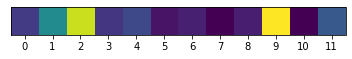

In [ ]:
v, p = model.predict(s.reshape(1,-1))
print("Value is", v, "\n")
print("Policy is", p, "\n")
plt.xticks(np.arange(0,12,1))
plt.yticks([])
plt.imshow(p)

print("Chosen action is", np.argmax(p), "or", cube.action_space[np.argmax(p)])

In [ ]:
weight_data = model.get_weights()

# for i in range(10):
#   print(len(weight_data[i]))

for i in range(10):
  print(np.shape(weight_data[i]))

(54, 128)
(128,)
(128, 256)
(256,)
(256, 128)
(128,)
(128, 1)
(1,)
(128, 12)
(12,)


In [ ]:
min_num = float('inf')
for i in range(10):
  if min_num > np.min(weight_data[i]):
    min_num = np.min(weight_data[i])
print("min is", min_num)

max_num = -float('inf')
for i in range(10):
  if max_num < np.max(weight_data[i]):
    max_num = np.max(weight_data[i])
print("max is", max_num)

min is -10.361931
max is 0.97737634


Text(0.5, 1.0, '12 bias')

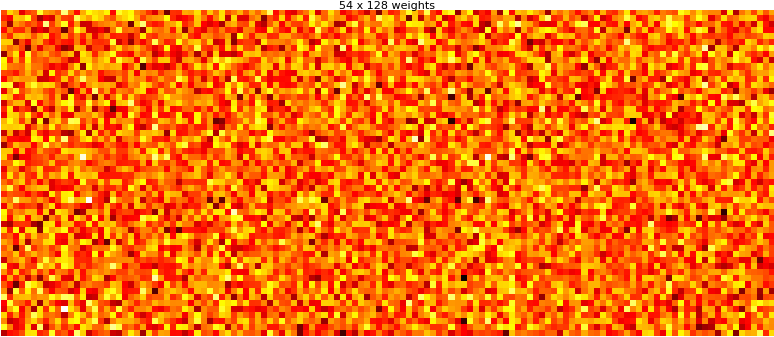

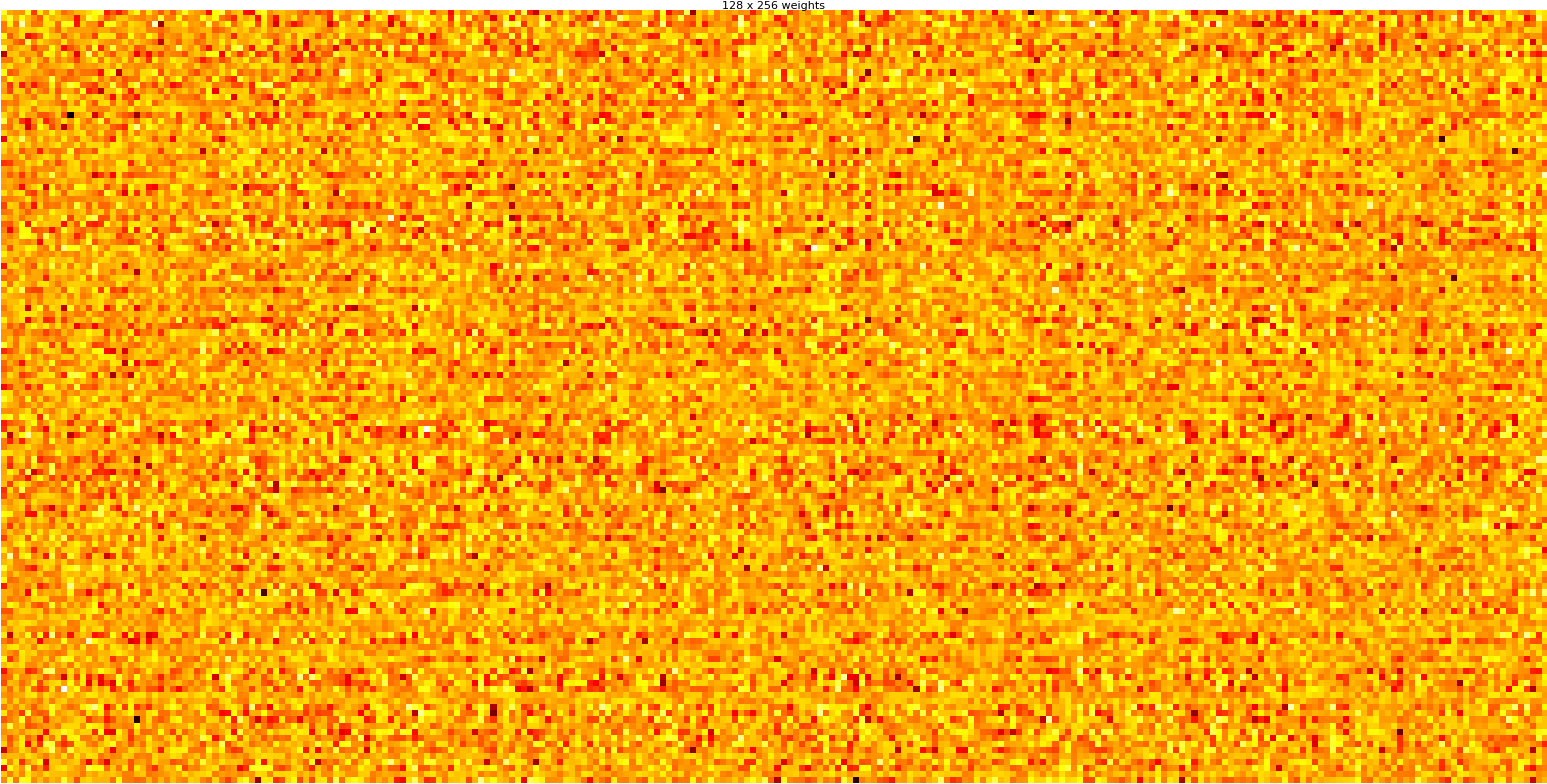

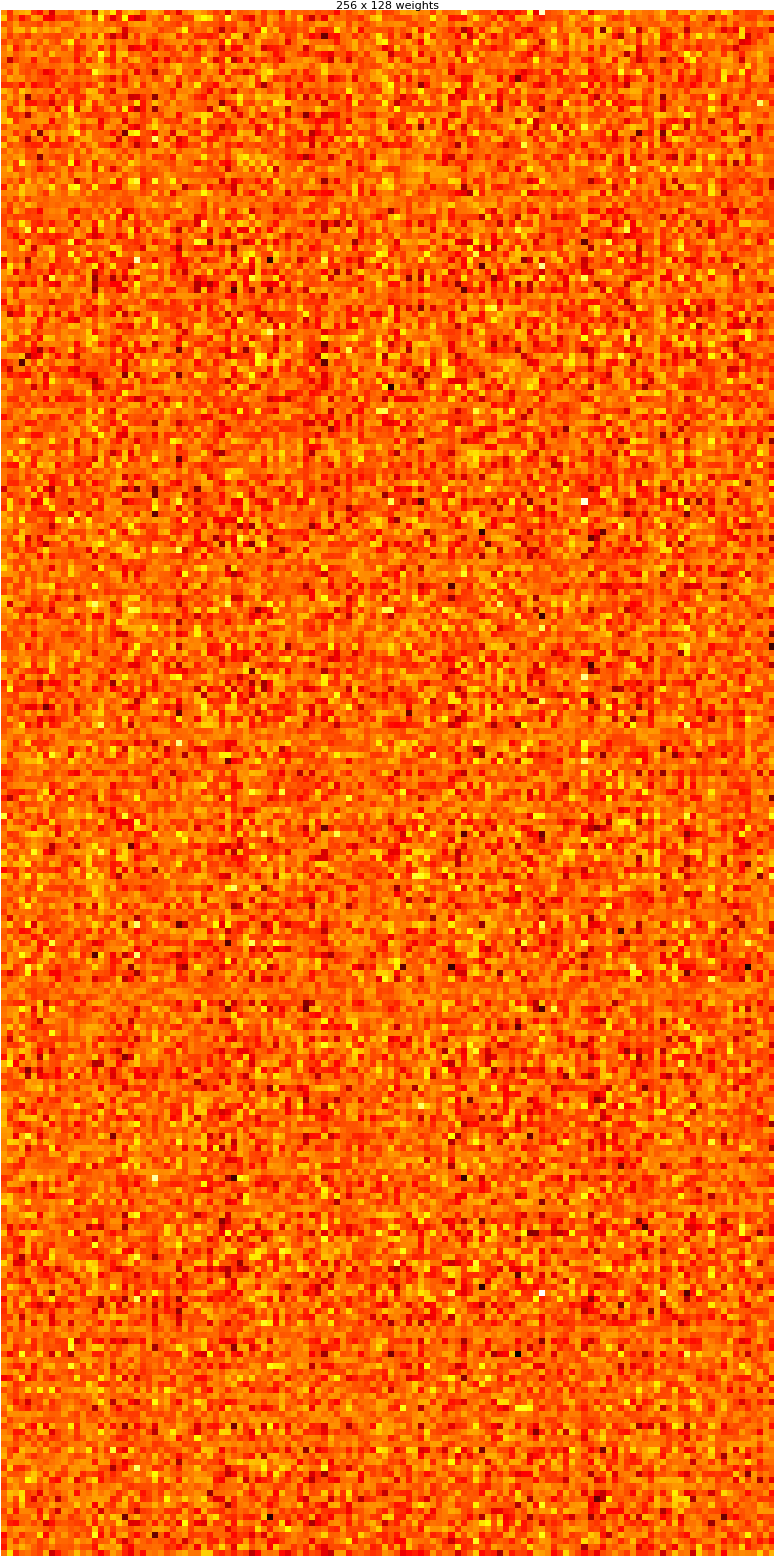

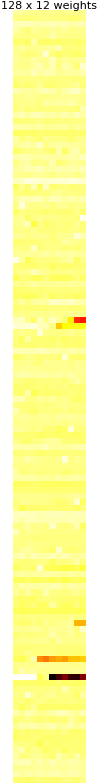

In [ ]:
# plot all weights
plt.figure(figsize=[128,54], dpi=8)
plt.imshow(weight_data[0], cmap = 'hot')
# plt.xticks([0,127])
# plt.yticks([0,53])
plt.axis('off')
plt.gca().set_title("54 x 128 weights", size=100)

plt.figure(figsize=[128,1], dpi=8)
plt.imshow(weight_data[1].reshape(1,-1), cmap = 'hot')
plt.axis('off')
plt.gca().set_title("128 bias", size=100)

plt.figure(figsize=[256,128], dpi=8)
plt.imshow(weight_data[2], cmap = 'hot')
plt.axis('off')
plt.gca().set_title("128 x 256 weights", size=100)

plt.figure(figsize=[256,1], dpi=8)
plt.imshow(weight_data[3].reshape(1,-1), cmap = 'hot')
plt.axis('off')
plt.gca().set_title("256 bias", size=100)

plt.figure(figsize=[128,256], dpi=8)
plt.imshow(weight_data[4], cmap = 'hot')
plt.axis('off')
plt.gca().set_title("256 x 128 weights", size=100)

plt.figure(figsize=[128,1], dpi=8)
plt.imshow(weight_data[5].reshape(1,-1), cmap = 'hot')
plt.axis('off')
plt.gca().set_title("128 bias", size=100)

plt.figure(figsize=[128,1], dpi=8)
plt.imshow(weight_data[6].reshape(1,-1), cmap = 'hot')
plt.axis('off')
plt.gca().set_title("128 x 1 weights", size=100)

plt.figure(figsize=[1,1], dpi=8)
plt.imshow(weight_data[7].reshape(1,-1), cmap = 'hot')
plt.axis('off')
plt.gca().set_title("1 bias", size=100)

plt.figure(figsize=[12,128], dpi=8)
plt.imshow(weight_data[8].reshape(128,12), cmap = 'hot')
plt.axis('off')
plt.gca().set_title("128 x 12 weights", size=100)

plt.figure(figsize=[12,1], dpi=8)
plt.imshow(weight_data[9].reshape(1,-1), cmap = 'hot')
plt.axis('off')
plt.gca().set_title("12 bias", size=100)
# plt.colorbar(orientation='horizontal')